In [ ]:
import pandas as pd
import numpy as np

In [ ]:
movies=pd.read_csv('imdb-top-1000.csv')
movies

In [ ]:
genres=movies.groupby('Genre')
genres.min()

In [ ]:
genres.mean(numeric_only=True)

In [ ]:
# find the top 3 genres by total earning
movies.groupby('Genre').sum(numeric_only=True)['Gross'].sort_values(ascending=False).head(3)

In [ ]:
movies.groupby('Genre')['Gross'].sum(numeric_only=True).sort_values(ascending=False).head(3)

In [ ]:
movies.head(1)

In [ ]:
#mujhse us genre ka naam nikalna h jinka imdb avg highest h
movies.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False).head(1)



In [ ]:
#Find Director with most popularity
movies.groupby('Director')['No_of_Votes'].sum().sort_values(ascending=False).head(1)

In [ ]:
# find the highest rated movie of each genre
for group,data in genres:
    print(data[data['IMDB_Rating']== data['IMDB_Rating'].max()])

In [ ]:
print(data[data['IMDB_Rating'] == data['IMDB_Rating'].max()])

In [ ]:
# find number of movies done by each actor
movies.groupby('Series_Title')['Star1'].sum().value_counts()

# GroupBy Attributes and Methods
# find total number of groups -> len
# find items in each group -› size
# first()/last() -> nth item
# get_group -> vs filtering
# groups
# describe
# sample
# nunique

In [ ]:
#groupby attributes and meth0ds
len(movies.groupby('Genre'))


In [ ]:
movies['Genre'].nunique()

In [ ]:
movies.groupby('Genre').size()

In [ ]:
genre=movies.groupby('Genre')

In [ ]:
genre.first()
genre.last()
genre.nth(7)

In [ ]:
movies.head(20)

In [ ]:
genre.get_group('Horror')

In [ ]:
genre.get_group('Fantasy')

In [ ]:
movies[movies['Genre']=='Fantasy']

In [ ]:
genres.groups

In [ ]:
genre.describe()

In [ ]:
genre.sample(2,replace=True)

In [ ]:
genre.nunique()

In [ ]:
#aggregate method --> Ek sath multiple Aggregation methods 
# (like mean,sum,median,prod)ek sath bhi laga skte h 

In [ ]:
genre_agg=genre.agg({
    "Runtime":'mean',
    'IMDB_Rating':'mean',
    'No_of_Votes':'sum',
    'Gross':'sum',
    'Metascore':'min'
})
genre_agg

In [ ]:
# passing list
movies.groupby('Genre').agg(['min','max','sum'])

In [ ]:
#Adding both the syntax
genre_agg=genre.agg({
    "Runtime":['mean','median','sum'],
    'IMDB_Rating':'mean',
    'No_of_Votes':'sum',
    'Gross':'sum',
    'Metascore':'min'
})
genre_agg

# looping on groups

In [ ]:
genres
for group,data in genres:
    print(type(group) , type(data))
    print(data)

In [ ]:
#split(apply) combine
#apply ---> builtin function
genre.apply(min) 

In [ ]:
# find number of movies starting with A for each group

In [ ]:
def Foo(group):
    print(group)
    return group

In [ ]:
genres.apply(Foo)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

In [ ]:
flight=pd.read_csv('airlines_flights_data.csv')
flight.head(2)

In [ ]:
# •	Delhi se Mumbai jaane wali flights kaun kaun si hain?
# 	•	Jinki departure_time = Evening hai unka data nikalo.
# 	# •	Jinki price 6000 se kam hai unhe filter karo.

In [ ]:
a=flight[(flight['source_city']=='Delhi') & (flight['destination_city']=='Mumbai') ] 
a[a['price']>4000]

In [ ]:
flight[flight['departure_time']=='Evening']

In [ ]:
flight[flight['price']<6000]

In [ ]:
# Sorting
# Sab flights ko price ke basis pe ascending order me sort karo.
# Sabse zyada duration wali top 3 flights ka data nikalo.

In [ ]:
flight.sort_values(by='price',ascending=False)

In [ ]:
flight.sort_values(by='duration',ascending=False).head(3)

In [ ]:
# Har airline ka average price nikaalo.
# Har airline ka minimum aur maximum duration batao.
# Har source_city se kitni flights hain ye count karo.

In [ ]:
flight.groupby('airline')['price'].mean()

In [ ]:
flight.groupby('airline')['duration'].agg(['min','max'])

In [ ]:
# Har source_city se kitni flights hain ye count karo.
flight['totalflight']=flight.groupby('source_city')['flight'].transform('count')
flight

In [ ]:
# String based
# Jinke flight code "SG" se start hote hain unhe filter karo.
# Jinke destination_city "M"se start hote hain unka data nikalo.

In [298]:
flight[flight['flight'].str.startswith('SG')]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,totalflight
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,61343
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,61343
28,28,SpiceJet,SG-8169,Delhi,Evening,zero,Night,Mumbai,Economy,2.33,1,10260,61343
38,38,SpiceJet,SG-2976,Delhi,Evening,one,Night,Mumbai,Economy,4.50,1,12123,61343
39,39,SpiceJet,SG-2976,Delhi,Evening,one,Morning,Mumbai,Economy,15.25,1,12123,61343
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205560,205560,SpiceJet,SG-731,Chennai,Early_Morning,zero,Early_Morning,Hyderabad,Economy,1.25,37,1551,38700
205644,205644,SpiceJet,SG-731,Chennai,Early_Morning,zero,Early_Morning,Hyderabad,Economy,1.25,38,1106,38700
205822,205822,SpiceJet,SG-731,Chennai,Early_Morning,zero,Early_Morning,Hyderabad,Economy,1.25,40,1106,38700
206005,206005,SpiceJet,SG-731,Chennai,Early_Morning,zero,Early_Morning,Hyderabad,Economy,1.25,42,1106,38700


In [300]:
flight[flight['destination_city'].str.startswith('M')]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,totalflight
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,61343
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,61343
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,61343
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,61343
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,61343
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293393,293393,Vistara,UK-832,Chennai,Early_Morning,one,Night,Mumbai,Business,14.92,49,69713,38700
293394,293394,Vistara,UK-832,Chennai,Early_Morning,one,Evening,Mumbai,Business,11.25,49,71483,38700
293395,293395,Vistara,UK-832,Chennai,Early_Morning,one,Night,Mumbai,Business,13.00,49,72065,38700
293396,293396,Vistara,UK-832,Chennai,Early_Morning,one,Night,Mumbai,Business,13.17,49,80566,38700


In [290]:
flight.head(1)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,totalflight
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,61343


In [ ]:
# 5.Combination filters
# Delhi → Mumbai flights jo "zero" stops wali hain aur class = Economy hain unhe filter karo.
# "Morning" wali flights jinka price 6000 se zyada hai.


In [321]:
mask = flight[(
    (flight["source_city"] == "Delhi") &
    (flight["destination_city"] == "Mumbai") &
    (flight["stops"].str.lower() == "zero") &
    (flight["class"] == "Economy")
)]
mask

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,totalflight
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,61343
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,61343
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,61343
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,61343
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,61343
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9851,9851,Indigo,6E-5328,Delhi,Morning,zero,Morning,Mumbai,Economy,2.25,49,3001,61343
9861,9861,Indigo,6.00E-171,Delhi,Late_Night,zero,Late_Night,Mumbai,Economy,2.08,49,3570,61343
9862,9862,Indigo,6E-2176,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.08,49,3570,61343
9863,9863,Indigo,6E-864,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,49,3570,61343


In [ ]:
# "Morning" wali flights jinka price 6000 se zyada hai.

In [323]:
flight[(flight['arrival_time']=='Morning' )& ( flight['price']>6000)]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,totalflight
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060,61343
24,24,Indigo,6E-5328,Delhi,Morning,zero,Morning,Mumbai,Economy,2.50,1,6165,61343
32,32,Vistara,UK-813,Delhi,Evening,one,Morning,Mumbai,Economy,14.67,1,12150,61343
33,33,Vistara,UK-817,Delhi,Evening,one,Morning,Mumbai,Economy,16.17,1,12150,61343
34,34,Vistara,UK-819,Delhi,Afternoon,one,Morning,Mumbai,Economy,18.00,1,12150,61343
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300138,300138,Vistara,UK-832,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.33,49,51457,38700
300142,300142,Air_India,AI-539,Chennai,Evening,one,Morning,Hyderabad,Business,16.00,49,51345,38700
300144,300144,Air_India,AI-539,Chennai,Evening,one,Morning,Hyderabad,Business,18.92,49,51345,38700
300145,300145,Air_India,AI-430,Chennai,Morning,one,Morning,Hyderabad,Business,23.08,49,51345,38700


In [ ]:
# 6.Extra
# Har airline ka sabse sasta flight price nikaalo.
# Har days_left ke hisaab se average price plot karo (line graph).
# Har source_city ke liye kitni unique destination_city hain?


In [328]:
a=flight.groupby('airline')['price']
a.min()

airline
AirAsia      1105
Air_India    1526
GO_FIRST     1105
Indigo       1105
SpiceJet     1106
Vistara      1714
Name: price, dtype: int64

<Axes: xlabel='days_left'>

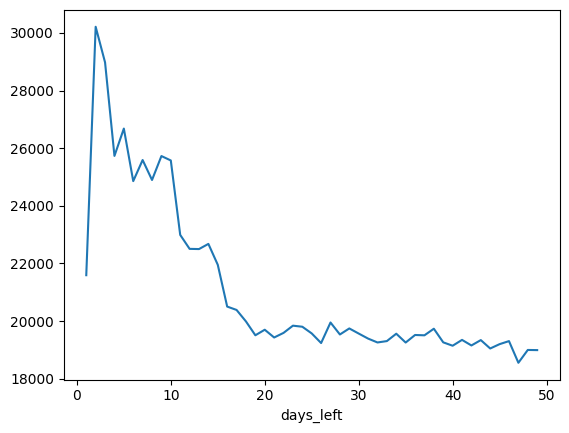

In [332]:
flight.groupby('days_left')['price'].mean().plot()


In [334]:
# Har source_city ke liye kitni unique destination_city hain?
flight.groupby('source_city')['destination_city'].nunique()

source_city
Bangalore    5
Chennai      5
Delhi        5
Hyderabad    5
Kolkata      5
Mumbai       5
Name: destination_city, dtype: int64

In [338]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
 12  totalflight       300153 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 29.8+ MB
